#  Bank Churn Prediction using Supervised Machine Learning

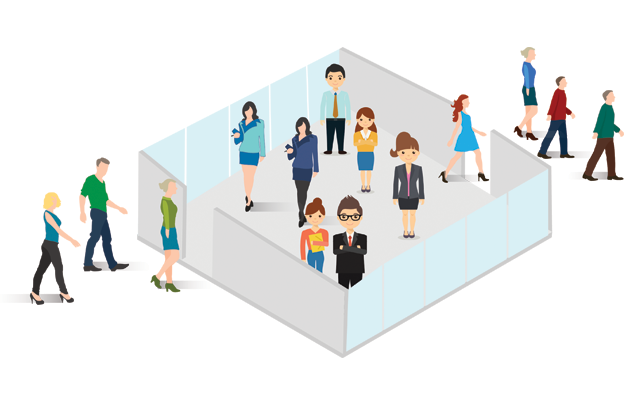

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

In [110]:
#! pip install scikit-plot
# %pip install imbalanced-learn
#! pip install imblearn

from sklearn.linear_model import LogisticRegression

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

#pyo.init_notebook_mode()
sns.set_style('darkgrid')

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import mutual_info_classif

In [176]:
bank = pd.read_csv('BankChurners.csv')
# renaming Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

bank.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'nb_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'nb_2'}, inplace = True)
bank.Attrition_Flag.replace(["Existing Customer", 'Attrited Customer'], [0 , 1], inplace=True) 

## Excploring the Data

In [112]:
bank.corr().style.background_gradient() 

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb_1,nb_2
CLIENTNUM,1.000000,-0.046430,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410
Attrition_Flag,-0.046430,1.000000,0.018203,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410,0.999989,-0.999989
Customer_Age,0.007613,0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_count,0.006772,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_book,0.134588,0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,0.006907,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.005729,0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,0.005694,0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.005708,-0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.000825,-0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032


In [113]:
bank.Attrition_Flag.value_counts() 

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [114]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'nb_1', 'nb_2'],
      dtype='object')

In [115]:
bank.info() 
# no Nan values, great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Age Distribution

In [116]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=bank['Customer_Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=bank['Customer_Age'],name='Age Histogram', marker_color='#CBE41D')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1) 

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

### Gender and Card status

In [117]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Platinum Card Holders','<b>Blue Card Holders<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=bank.Gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>'],hole=0.3,pull=[0,0.3]),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=['Female Platinum Card Holders','Male Platinum Card Holders'],
        values=bank.query('Card_Category=="Platinum"').Gender.value_counts().values,
        pull=[0,0.05,0.5],
        hole=0.3
        
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=['Female Blue Card Holders','Male Blue Card Holders'],
        values=bank.query('Card_Category=="Blue"').Gender.value_counts().values,
        pull=[0,0.2,0.5],
        hole=0.3
    ),
    row=2, col=2
) 



fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Distribution Of Gender And Different Card Statuses<b>",
)

fig.show()

### Churn count

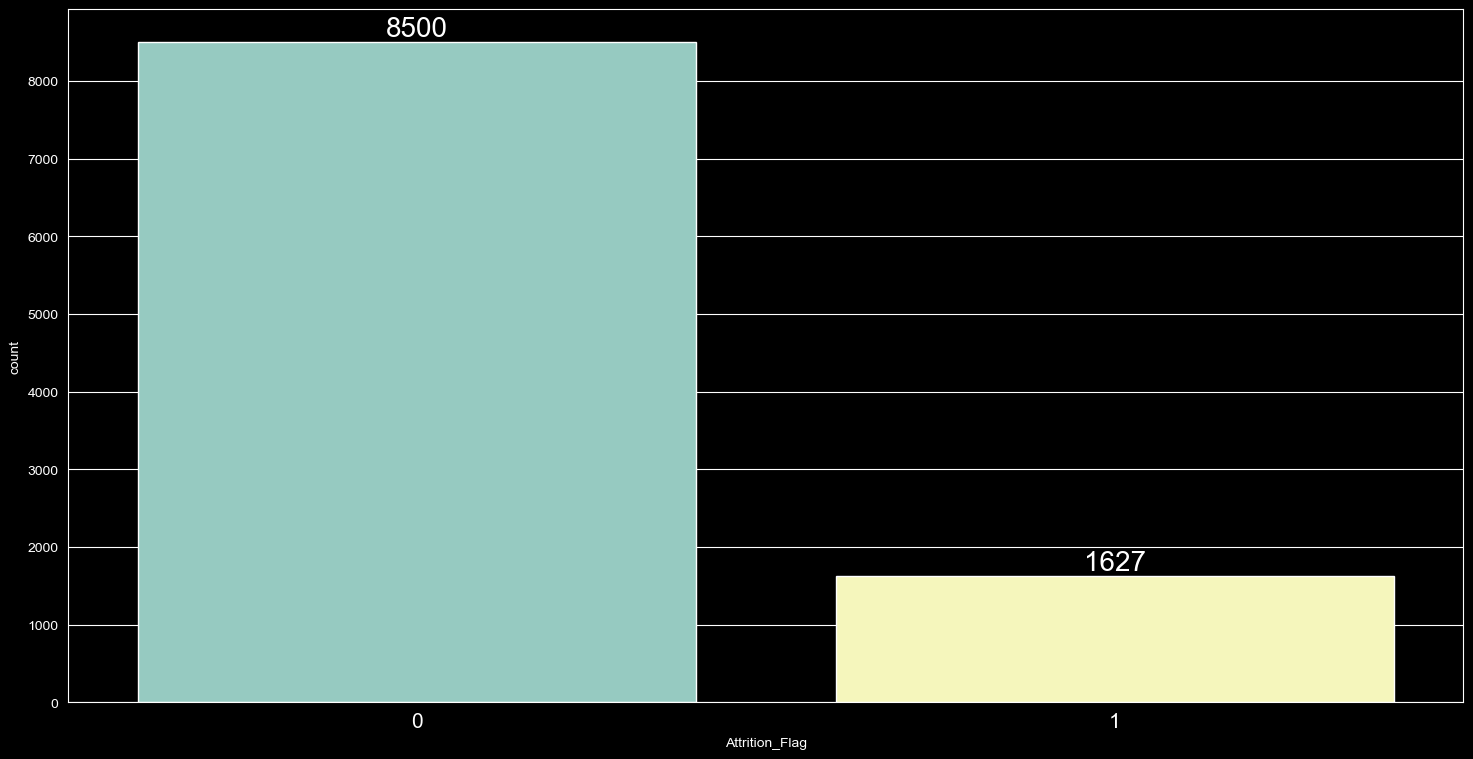

In [178]:
fig, ax = plt.subplots()
ax = sns.countplot(x=bank['Attrition_Flag']) 
for i in ax.containers:
    ax.bar_label(i, fontsize=20)
plt.xticks(fontsize=15) 
plt.style.use('dark_background')


 ### PCA for claserification 

In [121]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb_1,nb_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [122]:
X = bank.select_dtypes('number').copy().drop([target, "CLIENTNUM", "nb_1", "nb_2"], axis=1)  
scaler = StandardScaler()
decomp = PCA(n_components=4)
cluster = KMeans(3)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kmeans', KMeans(n_clusters=3))])

In [124]:
values = pipe[:2].transform(X)

pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
X = X.join(pd.DataFrame(values, columns=pca_labels))
X['clusters'] = pipe['kmeans'].labels_

In [126]:
X.to_csv("X_save", index=False)
X_save = pd.read_csv("X_save") 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

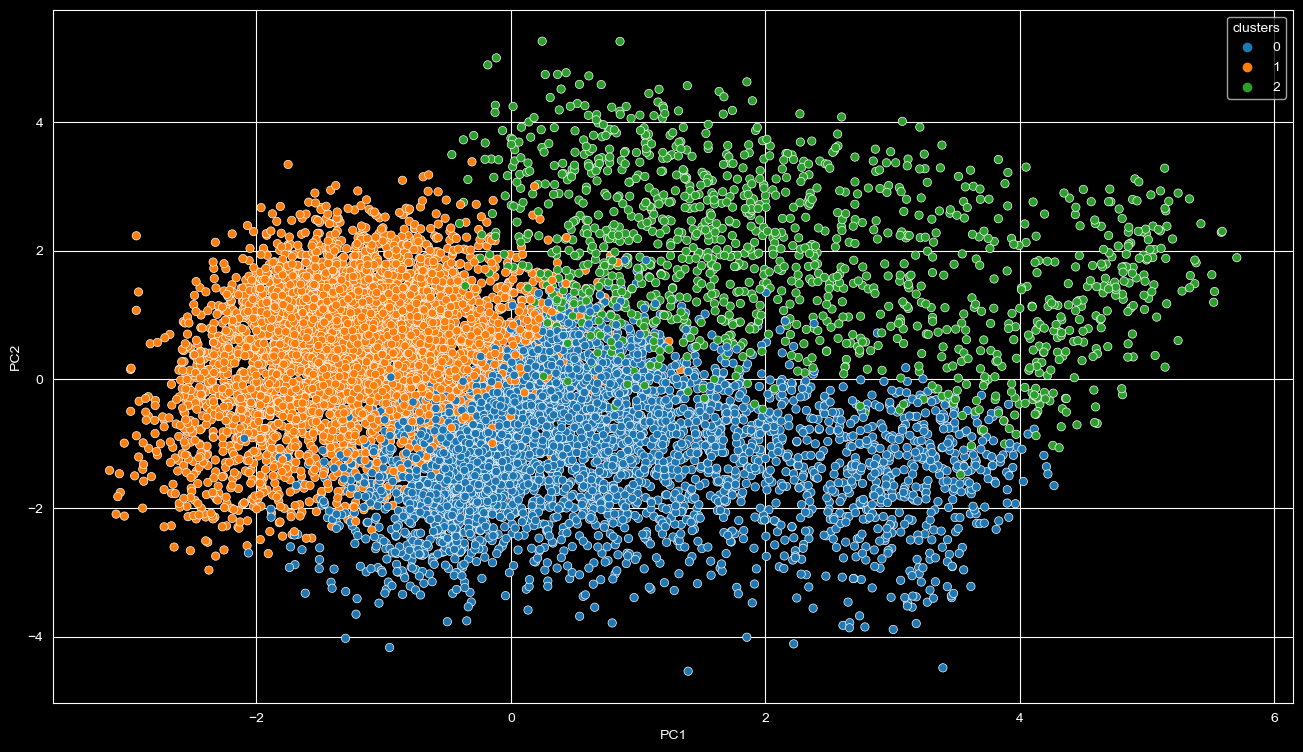

In [127]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=X_save, x='PC1', y='PC2', hue='clusters', palette="tab10") 
# 3 clusters are visible!

In [129]:
# this gives us the component of each PC
components = pd.DataFrame(
    data=pipe['pca'].components_, 
    columns=X_save.columns[:14], 
    index=[f"PC{i}" for i in range( 1, 4 + 1 )])

components 

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
PC1,-0.044530,0.081101,-0.035945,-0.174269,-0.023157,-0.013939,0.538260,-0.159842,0.552477,-0.005526,0.296697,0.231387,-0.004849,-0.443756
PC2,-0.271199,0.078022,-0.268771,-0.228699,-0.095799,-0.193975,-0.141877,0.256321,-0.164827,0.141563,0.484090,0.509241,0.210007,0.279658
PC3,0.629788,-0.148917,0.629550,-0.170687,0.069406,-0.120292,-0.008374,0.140628,-0.020979,-0.043935,0.232165,0.217216,0.039882,0.107449
PC4,0.050434,-0.039236,0.048138,0.281491,-0.102431,-0.047044,0.269006,0.369186,0.235852,0.535033,-0.165613,-0.176034,0.519149,0.152242


# Supervised Machine Learning Models 

In [130]:
target = 'Attrition_Flag' 
X = bank.drop([target, "CLIENTNUM", "nb_1", "nb_2"], axis=1) 
y = bank[target] 

In [131]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  

In [132]:
num_cols = np.array(X.select_dtypes(include = np.number).columns)
cat_cols = np.array(X.select_dtypes(include = "object").columns)

num_trans = MinMaxScaler()
cat_trans = OneHotEncoder(drop = "first")
preproc = make_column_transformer(
            (num_trans, num_cols),
            (cat_trans, cat_cols))

clf = LogisticRegression()
pipe = make_pipeline(preproc, clf)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  array(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'], dtype=object))])),
                ('logisticregression', LogisticRegression())])

In [133]:
# These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(suppress=True)
# actual predictions 
pipe.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [134]:
#pipe.score(X_train, y_train) 

###  Logistic Regression in confusion matrix with C params

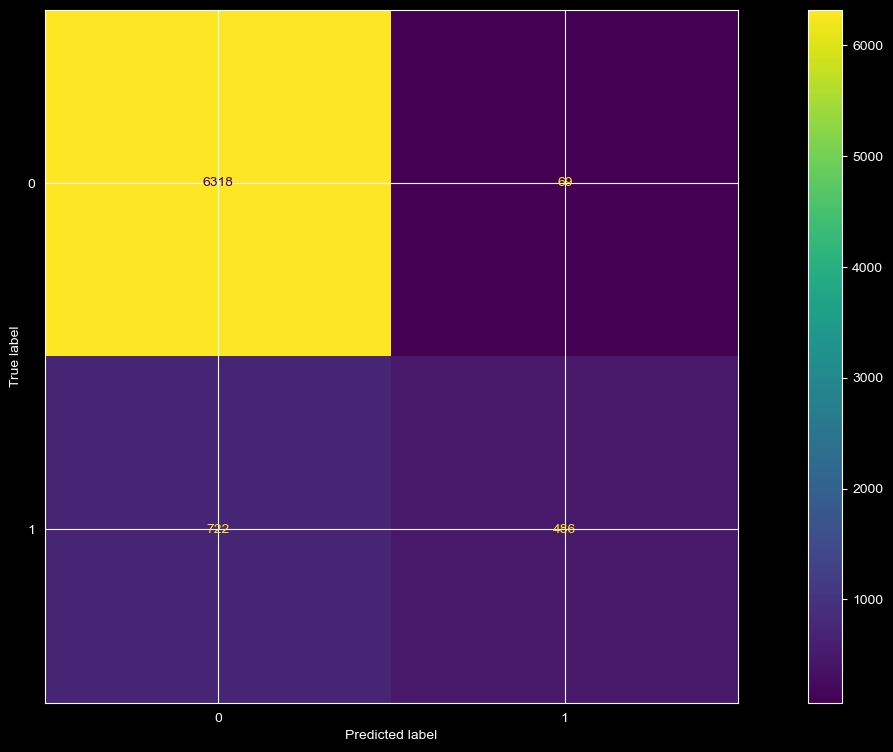

C: 0.1 |  f1_score: 0.551332955190017


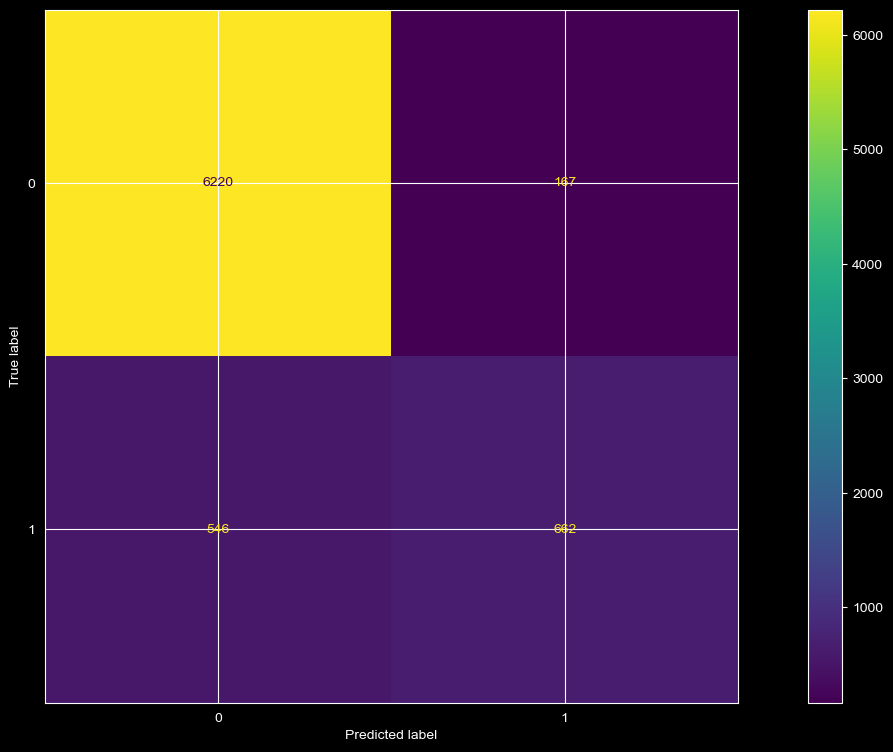

C: 1 |  f1_score: 0.6499754540991654


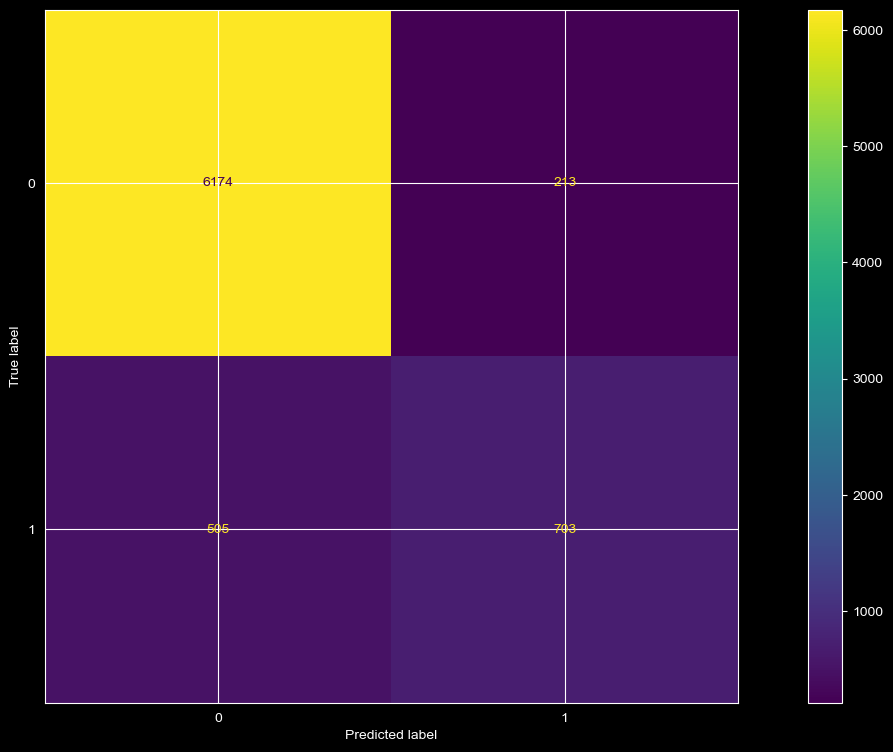

C: 10 |  f1_score: 0.6619585687382298


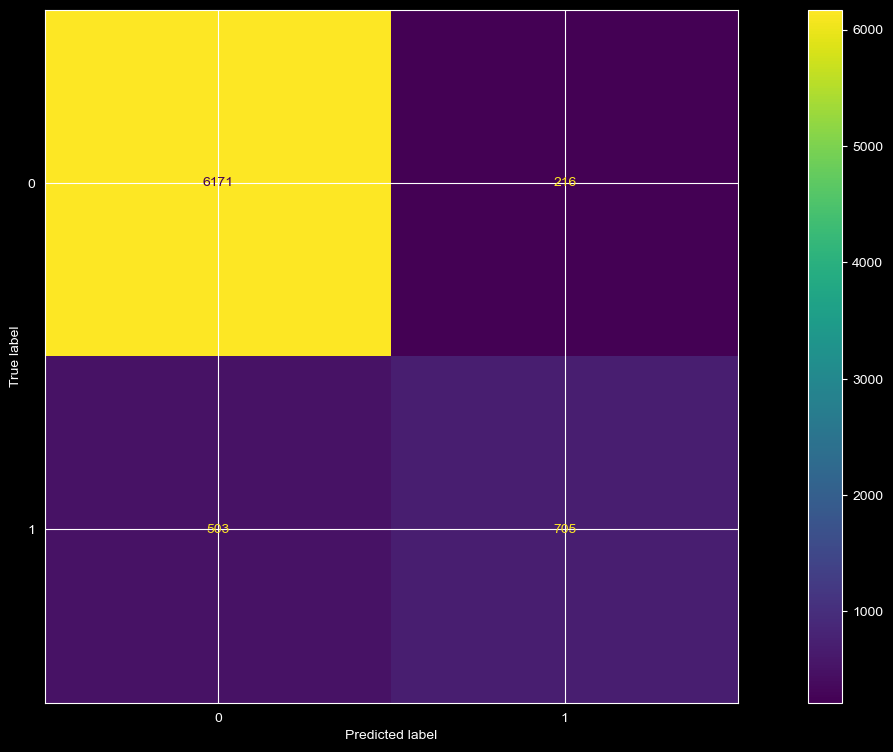

C: 20 |  f1_score: 0.6622827618600281


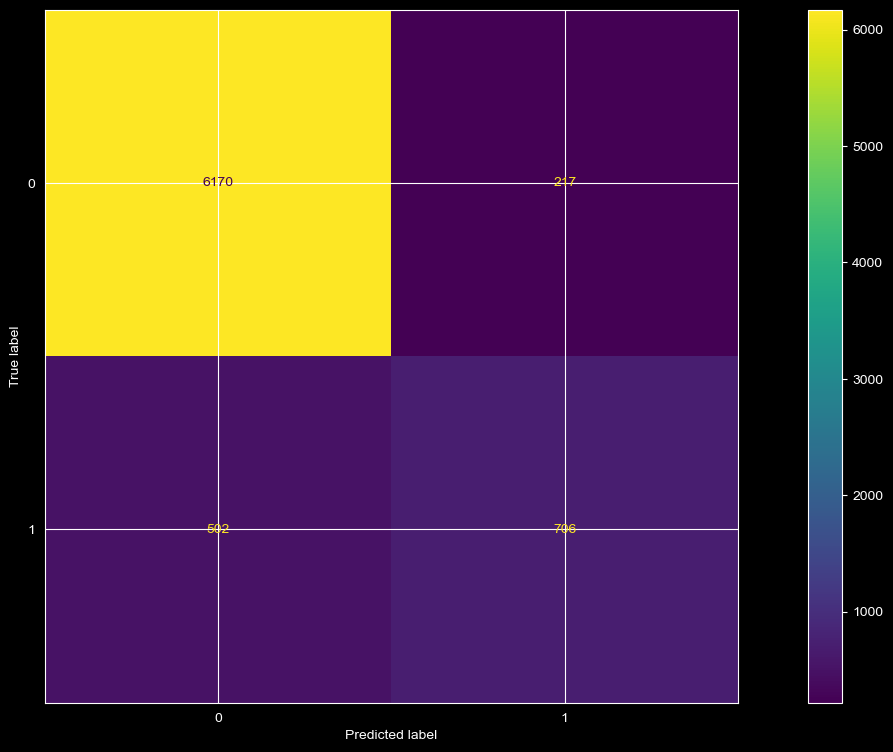

C: 50 |  f1_score: 0.6625997184420459


In [135]:
c_params =  [0.1, 1, 10, 20, 50]

for i in c_params:
    scaler = StandardScaler()
    clf = LogisticRegression(C=i) 
    pipe = make_pipeline(preproc, clf)
    pipe.fit(X_train, y_train)     

    model_score = f1_score(y_train, pipe.predict(X_train)) 
    y_pred = pipe.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels = pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipe.classes_)
    disp.plot() 
    plt.show() 
    print(f"C: {i} |  f1_score: {model_score}") 

# Other methods

In [136]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import make_pipeline 

target = 'Attrition_Flag' 
X = bank.drop([target, "CLIENTNUM", "nb_1", "nb_2"], axis=1) 
y = bank[target] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

num_cols = np.array(X.select_dtypes(include = np.number).columns)
cat_cols = np.array(X.select_dtypes(include = "object").columns)

num_trans = MinMaxScaler()
cat_trans = OneHotEncoder(drop = "first")
preproc = make_column_transformer(
            (num_trans, num_cols),
            (cat_trans, cat_cols))

clasifiers = [ LogisticRegression(),
              RandomForestClassifier(),
              SVC(),
              KNeighborsClassifier()]

In [138]:
for clasifier in clasifiers: 
    pipe = make_pipeline(preproc, clasifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="f1")
    grid.fit(X_train, y_train) 
    
    print(f"Train score for {clasifier}: {grid.best_score_}\n") 

Train score for LogisticRegression(): 0.6420972517853076

Train score for RandomForestClassifier(): 0.8459560114567284

Train score for SVC(): 0.6218897037119402

Train score for KNeighborsClassifier(): 0.3366621789853845



In [139]:
# Train score for RandomForestClassifier(): 0.8480188092272553

## Train data in 4 models : Best score & Best params

### LogisticRegression

In [140]:
param_grid_logreg = {"logisticregression__C" : [0.1, 1, 4, 10]}

clasifier =  LogisticRegression(max_iter=1000) 
pipe = make_pipeline(preproc, clasifier) 

grid_logreg = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_logreg,
    cv=5,
    scoring="f1")
grid_logreg.fit(X_train, y_train)

print("Best score :", grid_logreg.best_score_)
print("Best params :", grid_logreg.best_params_)  

Best score : 0.6591813511910922
Best params : {'logisticregression__C': 10}


### RandomForestClassifier

In [173]:
parem_grid_rf = {"randomforestclassifier__min_samples_leaf": [1, 2, 4],
                "randomforestclassifier__max_depth": [None, 1, 3, 4],
                "randomforestclassifier__n_estimators": [10, 50, 100]}

classifier = RandomForestClassifier()
pipe = make_pipeline(preproc, classifier)

grid_rf = GridSearchCV(
                            estimator=pipe,
                            param_grid=parem_grid_rf,
                            cv=5,
                            scoring="f1")
grid_rf.fit(X_train, y_train)

print("Best score", grid_rf.best_score_)
print("Best params", grid_rf.best_params_) 

Best score 0.849344890837467
Best params {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 50}


### Confusion matrix : RandomForestClassifier

Text(47.722222222222214, 0.5, 'Reality')

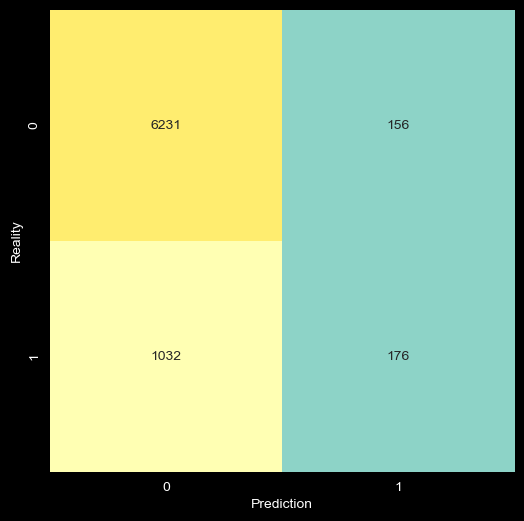

In [157]:
cm = confusion_matrix(y_train, pipe.predict(X_train), labels = pipe.classes_)
plt.figure(figsize =(6,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="Set3",cbar=False)
plt.xlabel("Prediction")
plt.ylabel("Reality") 

### SVC (Support Vector Classifier)

In [144]:
parem_grid_svc = {"svc__C": [0.01, 0.1, 1, 2, 50],
                "svc__gamma": [1, 0.01, 0.001, 0.0001]}

classifier = SVC()
pipe = make_pipeline(preproc, classifier)

grid_svc = GridSearchCV(
                            estimator=pipe,
                            param_grid=parem_grid_svc,
                            cv=5,
                            scoring="f1",
                            n_jobs=-1)

grid_svc.fit(X_train, y_train)

print("Best score", grid_svc.best_score_)
print("Best params", grid_svc.best_params_) 

Best score 0.6781023881365262
Best params {'svc__C': 50, 'svc__gamma': 0.01}


### KNeighborsClassifier

In [145]:
parem_grid_knn = {"kneighborsclassifier__n_neighbors": [3, 5, 11, 19],
                "kneighborsclassifier__metric": ["manhattan", "euclidean"]}

classifier = KNeighborsClassifier() 
pipe = make_pipeline(preproc, classifier)

grid_knn = GridSearchCV(
                            estimator=pipe,
                            param_grid=parem_grid_knn,
                            cv=5,
                            scoring="f1",
                            n_jobs=-1)

grid_knn.fit(X_train, y_train)

print("Best score", grid_knn.best_score_)
print("Best params", grid_knn.best_params_) 

Best score 0.4664900066002374
Best params {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3}


### 4 models  in one cell

In [146]:
train_models = {"logreg": grid_logreg, "random forest": grid_rf, "svc": grid_svc, "knn": grid_knn}

for  name, model in train_models.items():
    score = model.score(X_test, y_test)
    params = model.best_params_
    print(f"Score for {name}: {score}\nWith params {params}\n") 

Score for logreg: 0.6415620641562064
With params {'logisticregression__C': 10}

Score for random forest: 0.8370860927152319
With params {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 100}

Score for svc: 0.6666666666666666
With params {'svc__C': 50, 'svc__gamma': 0.01}

Score for knn: 0.4311926605504587
With params {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3}



### Visualization of model scores

In [163]:
v_1 = [grid_logreg.best_score_, grid_rf.best_score_, grid_svc.best_score_, grid_knn.best_score_]
v_2 = ["LOGREG", "RandomForest", "SVC" , "KNN"]

In [165]:
res_1 = pd.DataFrame(data=[v_1,v_2]).T 
res_1.rename(columns={0: "Highscore", 1: "Parameters"}, inplace=True)
res_1 

,Highscore,Parameters
0,0.659181,LOGREG
1,0.853653,RandomForest
2,0.678102,SVC
3,0.46649,KNN


(array([0, 1, 2, 3]),
 [Text(0, 0, 'LOGREG'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'KNN')])

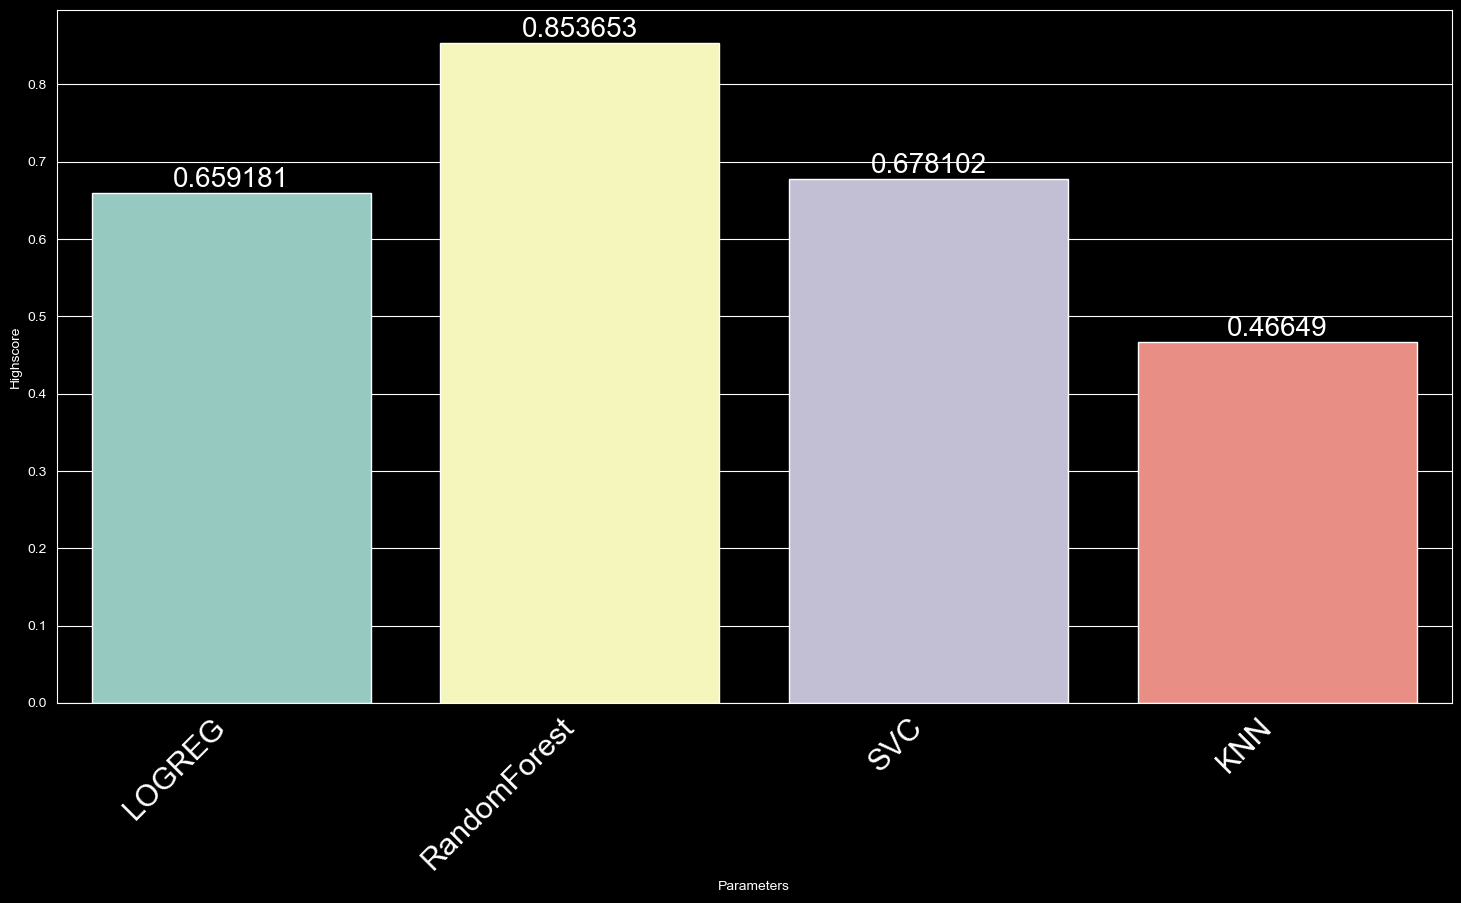

In [168]:
fig, ax = plt.subplots()
ax = sns.barplot(x=res_1.Parameters, y=res_1.Highscore) 
for i in ax.containers:
    ax.bar_label(i, fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=22) 

## Testing the best model on test data

In [151]:
f1(y_test, y_pred=grid_rf.predict(X_test)) 

0.8370860927152319

### Confusion matrix : RandomForestClassifier

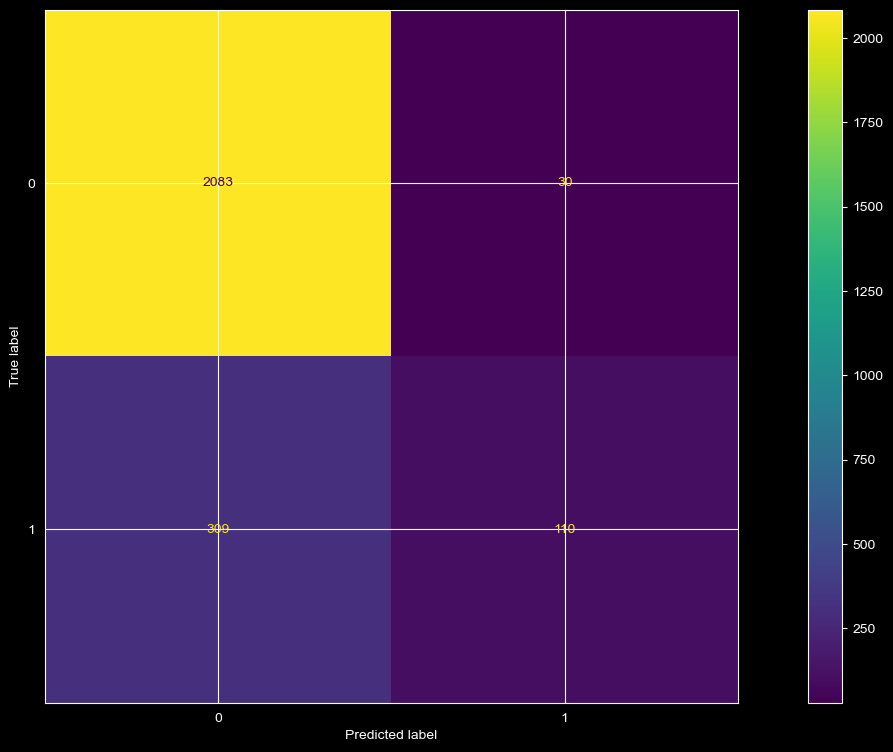

C: <BarContainer object of 4 artists> |  f1_score: 0.6625997184420459


In [152]:
pipe.fit(X_test, y_test)      
y_pred = pipe.predict(X_test) 
cm = confusion_matrix(y_test, y_pred, labels = pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipe.classes_)
disp.plot() 
plt.show() 
print(f"C: {i} |  f1_score: {model_score}") 

#### Confusion matrix edited : RandomForestClassifier

Text(47.722222222222214, 0.5, 'Reality')

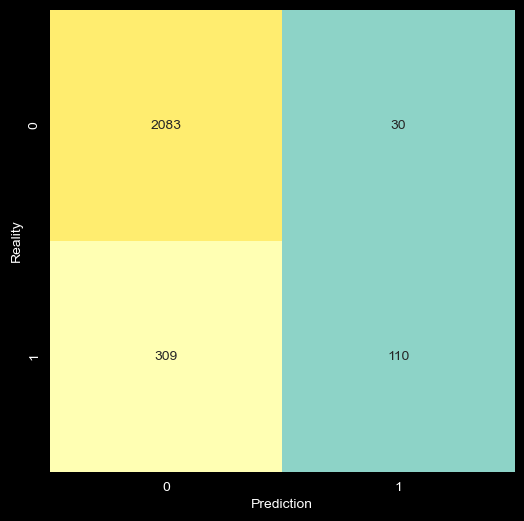

In [153]:
cm = confusion_matrix(y_test, pipe.predict(X_test), labels = pipe.classes_)
plt.figure(figsize =(6,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="Set3",cbar=False)
plt.xlabel("Prediction")
plt.ylabel("Reality") 
#plt.annotate("TP",(1.5,0.5))

## MI scores : derived from spearman correlation 

In [154]:
# mutual_info_classif 

discrete_features = X_save.dtypes == int
mi_scores = mutual_info_classif(X_save, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Contacts_Count_12_mon       0.158030
Credit_Limit                0.112187
Total_Revolving_Bal         0.089702
Months_on_book              0.088729
Total_Trans_Amt             0.066880
Total_Ct_Chng_Q4_Q1         0.049720
Avg_Open_To_Buy             0.049021
Months_Inactive_12_mon      0.032259
Avg_Utilization_Ratio       0.030185
Income_Category             0.026498
Total_Relationship_Count    0.022553
Total_Amt_Chng_Q4_Q1        0.021793
Marital_Status              0.021638
Total_Trans_Ct              0.010905
Education_Level             0.007855
Gender                      0.005445
Card_Category               0.004731
Dependent_count             0.003383
Customer_Age                0.001291
Name: MI Scores, dtype: float64

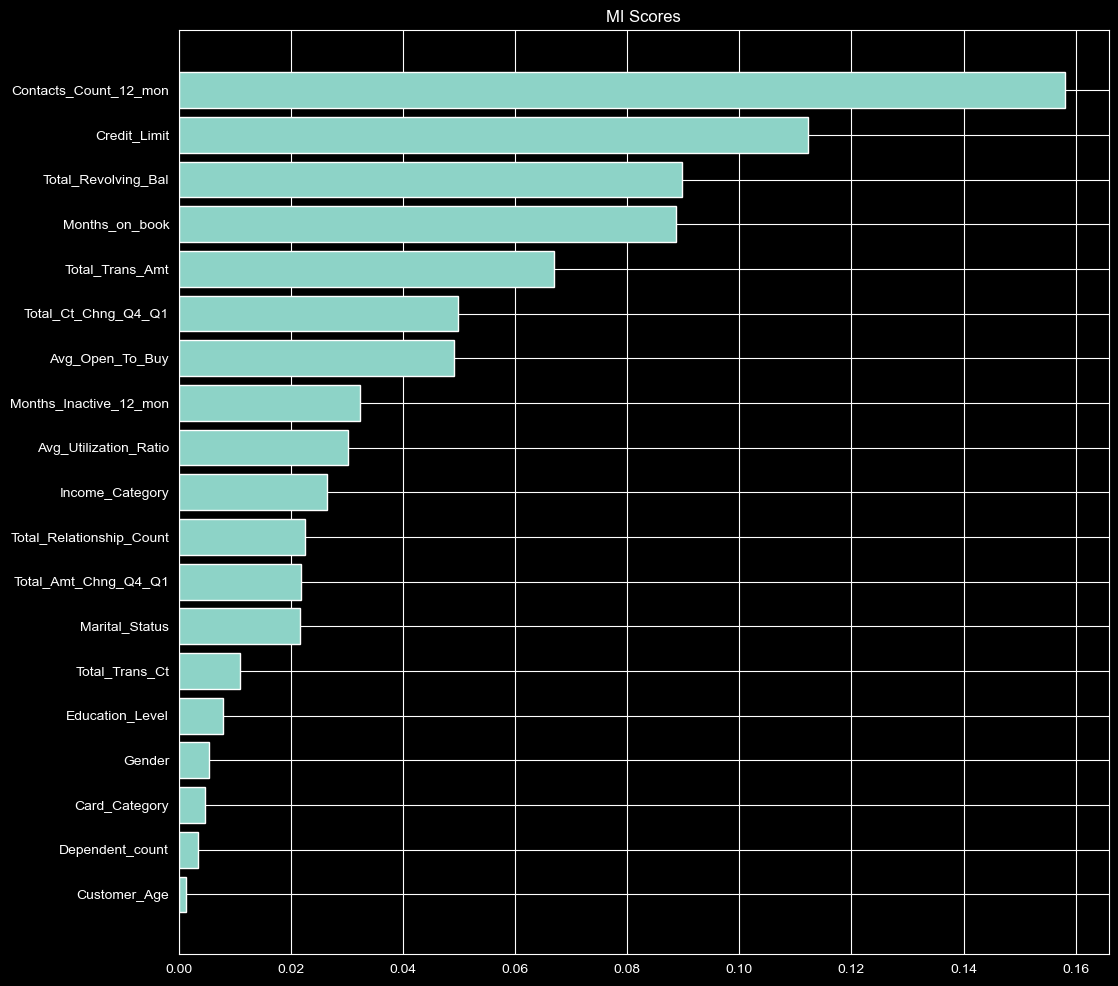

In [155]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores) 

 Hope you enjoyed ! 